In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from sklearn.cluster import KMeans

In [2]:
data_dir = '/storage/cluster/data/'
df = pd.read_excel(data_dir + 'data.xlsx')

In [3]:
df

,Unnamed: 0,number,x,y,z,virial_radius (Mpc),data_mass (log)
0,0,8,716,904,12,1.17,46.254537
1,1,10,500,840,16,1.56,46.634650
2,2,11,184,448,16,1.17,46.049630
3,3,12,120,616,16,1.17,46.091818
4,4,13,120,484,16,0.39,44.847325
...,...,...,...,...,...,...,...
1091,1091,1159,596,124,1008,0.78,45.711489
1092,1092,1160,296,316,1008,0.78,45.727725
1093,1093,1161,424,420,1012,0.78,45.678832
1094,1094,1163,824,204,1012,0.39,44.874593


In [4]:
df_array = df.to_numpy()

In [5]:
coord_x = df_array[:,2]
coord_y = df_array[:,3]
coord_z = df_array[:,4]

In [6]:
coords = np.array([coord_x,coord_y,coord_z]).T

In [11]:
num_cluster = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_cluster,random_state=0,algorithm='auto',n_init=20).fit(coords)

In [12]:
predict = KMeans(n_clusters=num_cluster,random_state=1,algorithm='auto',n_init=20).fit_predict(coords)

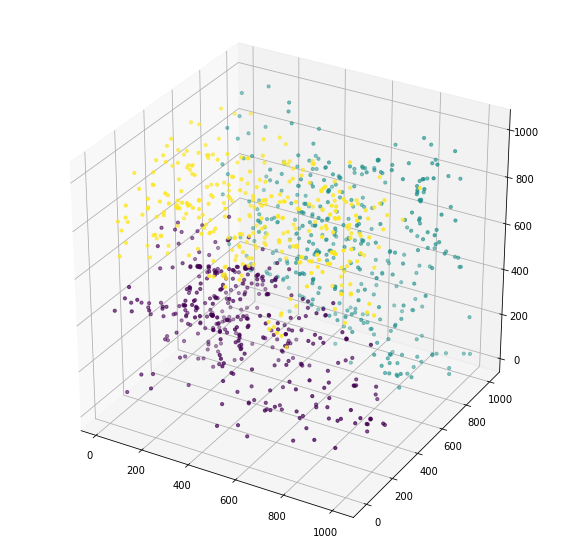

In [13]:
plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.scatter(coord_x,coord_y,coord_z,c=predict,s=10)

In [14]:
df['clustering'] = predict

In [15]:
table = df.sort_values(by=['clustering'])
table.to_excel('/storage/cluster/data/data.xlsx')

In [140]:
table = df.sort_values(by=['clustering'])
table_array = table.to_numpy()

In [146]:
for num in range(num_cluster):
    if np.where(table_array[:,8]==num_cluster):
        x = table_array[2,num_cluster]
        y = table_array[3,num_cluster]
        z = table_array[4,num_cluster]
        
    list(zip(x,y,z))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),)